<a href="https://github.com/fgonzaleumbc/DATA601/blob/main/Lecture06/15_Dates_Times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

In [1]:
from datetime import datetime # Datetime module
import numpy as np # Numpy module
import pandas as pd # Pandas module
from dateutil.relativedelta import relativedelta # Dateutil Module Relativedelta function 

%matplotlib inline
import matplotlib.pyplot as plt # MatPlotLib Plotting Module
import seaborn as sns # Seaborn Plotting Module

This notebook provides an overview of working with dates, times and periods. Specifically working and manipulating dates/times using the datetime, numpy, and pandas modules.


Content presented in this notebook is inspired by the following:
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)
- [Python Pandas Tutorial (Part 10): Working with Dates and Time Series Data](https://www.youtube.com/watch?v=UFuo7EHI8zc&ab_channel=CoreySchafer)

Documentation Reference:
- https://docs.python.org/3/library/datetime.html
- https://docs.python.org/3/library/datetime.html#datetime.datetime
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
- https://numpy.org/doc/stable/reference/arrays.datetime.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_period.html

Other References and examples on working with datetimes can be found in the following links:
- [Exercise from Python Data Science Handbook: Visualizing Seattle Bicycle Counts](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Example:-Visualizing-Seattle-Bicycle-Counts)
- [Blog on Seattle Really Seeing an Uptick in Cycling](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)

# Table of Contents
[Datetime Module: Datetime Objects](#Datetime-Module:-Datetime-Objects)

[Numpy "datetime64" type](#Numpy-"datetime64"-type)

[Pandas Datetime and Timestamp](#Pandas-Datetime-and-Timestamp)

[Pandas Datetimes in a Dataframe](#Pandas-Datetimes-in-a-Dataframe)

[Indexing by time](#Indexing-by-time)

[Pandas To Period](#Pandas-To-Period)

[Timestamp and Periods to Datetime](#Timestamp-and-Periods-to-Datetime)

[Pandas Dates and Period Filtering](#Pandas-Dates-and-Period-Filtering)

[Rolling Windows](#Rolling-Windows)

# Datetime Module: Datetime Objects
[Return to Table of Contents](#Table-of-Contents)

Datetime objects contain various parts that include month, day of the month, year, hour, seconds minuts, and other attributes such as timezone. Datetime can be can be either aware or naive depending on use of timezones. Aware object can locate itself relative to other aware objects while naive object do not contain enough information to unambiguously locate itself relative to other date/time objects. Datetime aware and naive object categories (https://docs.python.org/3/library/datetime.html#aware-and-naive-objects)

The datetime object can use one of the directives or codes below to convert or extract a section of the datetime object.

Directive          |  Meaning
-------------------|------------------
%a                 | Weekday as locale’s abbreviated name.
%A                 | Weekday as locale’s full name.
%w                 | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
%d                 | Day of the month as a zero-padded decimal number.
%b                 | Month as locale’s abbreviated name.
%B                 | Month as locale’s full name.
%m                 | Month as a zero-padded decimal number.
%y                 | Year without century as a zero-padded decimal number.
%Y                 | Year with century as a decimal number.
%H                 | Hour (24-hour clock) as a zero-padded decimal number.
%I                 | Hour (12-hour clock) as a zero-padded decimal number.
%p                 | Locale’s equivalent of either AM or PM.
%M                 | Minute as a zero-padded decimal number.
%S                 | Second as a zero-padded decimal number.
%j                 | Day of the year as a zero-padded decimal number.

In [2]:
# Datetime object example and structure.
datetime.now() # (year, month, day[, hour[, minute[, second[, microsecond[,tzinfo])

datetime.datetime(2023, 3, 13, 19, 21, 23, 119912)

In [3]:
# Create a datetime object
today = datetime(year = 2021, month = 10, day = 28)
today.strftime('%A')

'Thursday'

In [4]:
# Using the datetime directives.
datetime_now = datetime.now()
print(datetime_now) # Time at the moment the cell ran.
print(datetime_now.strftime('%a')) # Weekday as locale’s abbreviated name.
print(datetime_now.strftime('%A')) # Weekday as locale’s full name.
print(datetime_now.strftime('%w')) # Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
print(datetime_now.strftime('%d')) # Day of the month as a zero-padded decimal number.
print(datetime_now.strftime('%b')) # Month as locale’s abbreviated name.
print(datetime_now.strftime('%B')) # Month as locale’s full name.
print(datetime_now.strftime('%Y')) # Year with century as a decimal number.

2023-03-13 19:22:56.909082
Mon
Monday
1
13
Mar
March
2023


In [5]:
# Strtime works similar to print function.
datetime_now.strftime('Today is %A %B %d, %Y.')

'Today is Monday March 13, 2023.'

In [6]:
type(datetime_now)
# Note that datetime object/data type.

datetime.datetime

In [7]:
# Converts a string to a datetime as specified in the format.
string_to_date = datetime.strptime('06-01-2001', '%m-%d-%Y').date() 
string_to_date

datetime.date(2001, 6, 1)

In [8]:
# let's create a datetime object let's say my birthday 03-15-1982
my_birthday = datetime(year= 1982, month = 3, day =15)
my_birthday

datetime.datetime(1982, 3, 15, 0, 0)

In [9]:
# We can check the day of the week
my_birthday.strftime('%A')

'Monday'

In [10]:
# Note that using .strftime method we can convert the time into any string format.
my_birthday.strftime('(%a)-%d/%B--%Y')

'(Mon)-15/March--1982'

# Numpy "datetime64" type
[Return to Table of Contents](#Table-of-Contents)

Numpy also has a datetime data type which can be used with vectorized operations in arrays. Recall that arrays can only have one data type and process faster than other data collections.

Documentation References:
- https://numpy.org/doc/stable/reference/arrays.datetime.html
- https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units

In [11]:
# In the case of working with a lot dates and time this is the compact way to store data
# Use np.array with dtype argument to create today as np.datetime64 object
date = np.array(['2021-10-28'], dtype = 'datetime64')
date

array(['2021-10-28'], dtype='datetime64[D]')

In [12]:
## Note that we can easily apply vectorized operations.
date + np.arange(10) # Np.arrange produces integers from 0 to 9.

array(['2021-10-28', '2021-10-29', '2021-10-30', '2021-10-31',
       '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
       '2021-11-05', '2021-11-06'], dtype='datetime64[D]')

In [13]:
## We can select second as the unit and let's see the difference
date = np.array(['2021-10-28'], dtype = 'datetime64[Y]')

date + np.arange(12)

array(['2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028',
       '2029', '2030', '2031', '2032'], dtype='datetime64[Y]')

# Pandas Datetime and Timestamp
[Return to Table of Contents](#Table-of-Contents)

Pandas can work with datetime, timestamp and periods data types.

Documentation Reference:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [14]:
# One data structure used in pandas using is Timestamp
today = pd.Timestamp(year= 2022, month = 11, day = 21)
today

Timestamp('2022-11-21 00:00:00')

In [15]:
type(today) # Pandas Timestamp data type.

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
pd.Timestamp(ts_input = 10000, unit='D') # Units D = days. 10,000 days from reference date/time.

Timestamp('1997-05-19 00:00:00')

In [17]:
pd.Timestamp(ts_input = 0, unit='D') # Reference date and time for ts_input is 1970-01-01.

Timestamp('1970-01-01 00:00:00')

In [18]:
pd.Timestamp(ts_input = -1, unit='s') # Unit s = seconds. -1 second from reference date/time.

Timestamp('1969-12-31 23:59:59')

In [19]:
today.day_name()

'Monday'

In [20]:
today.strftime('%A')

'Monday'

In [21]:
# We can also use pd.to_datetime to create a timestamp.
pd.to_datetime('Oct. 28th 2021')

Timestamp('2021-10-28 00:00:00')

In [ ]:
# Pandas uses both datetime module and numpy.datetime64 data dtype
# We can use some of the methods used in these modules. 
# There are also some additional methods that are very hadny when you analyze data.

# Pandas Datetimes in a Dataframe
[Return to Table of Contents](#Table-of-Contents)

The following section uses data from [Ethereum](https://ethereum.org/en/eth/) crypto currency dates, prices and trading volume.

In [22]:
## let's consider the following example
data_url ='https://raw.githubusercontent.com/fgonzaleumbc/DATA601/main/Lecture05/input_data/ETH-1.csv'
# Note that we can load a dataframe directly from a file in a website.
df = pd.read_csv(data_url)

In [23]:
df.head(3)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [25]:
# Run this to see that it fails
#pd.to_datetime(df.Date)

In [ ]:
# Note that in this case it is not straight forward to convert strings to datetime
# Let's try pd.to_datetime

In [26]:
df.Date.iloc[1]

'2020-03-13 07-PM'

In [27]:
## We can use the format parameter to give the format of the string use pd.to_datetime together with format argument.
df.Date = pd.to_datetime(df.Date, 
                         format = '%Y-%m-%d %I-%p').iloc[1]
print(df['Date'].dtype)
df.head(3)

datetime64[ns]


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 19:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 19:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [28]:
# We can use parse_dates parameter and infer_datetime_format when pd.read_csv.
df1 = pd.read_csv(data_url, 
                   parse_dates = ['Date'], 
                   infer_datetime_format= True)
print(df1['Date'].dtype) # This approach does not seem to work in this case. Still looks like it is an object.
df1.head(3)

object


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [29]:
# Another way we can try is to define a function to define format.
# In this case we need to pass a parser to date_parser argument define my_time_parser 
# This takes a string and return pd.to_datetime 
def my_time_parser(date):
    return pd.to_datetime(date, format = '%Y-%m-%d %I-%p')

# Could have also used datetime.strptime mehtod

# Read_csv but this time pass my_time_parser to date_parser argument
df2 = pd.read_csv(data_url, 
                  parse_dates= ['Date'], 
                  date_parser= my_time_parser)

print(df2['Date'].dtype) # This approach seems to have worked.
df2.head(3)

datetime64[ns]


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [30]:
# We could directly pass a lambda function too in datetime.
df3 = pd.read_csv('https://raw.githubusercontent.com/fgonzaleumbc/DATA601/main/Lecture05/input_data/ETH-1.csv', 
                  parse_dates= ['Date'], 
                  date_parser = lambda date: datetime.strptime(date, '%Y-%m-%d %I-%p'))
df3.Date

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [31]:
# Note that each entry is an timestamp and can use the timestamp methods.
df3.Date.iloc[2].weekofyear # Week of year for date in index 2.

11

In [32]:
## We can use .dt class to be able to access datetime methods.
df3.Date.dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [33]:
# Check minimum of date feature
df3.Date.min()

Timestamp('2017-07-01 11:00:00')

In [34]:
# Check maximum of date feature
df3.Date.max()

Timestamp('2020-03-13 20:00:00')

In [35]:
# Note that results of operations are timedelta type
df3.Date.max() - df3.Date.min()

Timedelta('986 days 09:00:00')

In [36]:
df3.Date.min() - df3.Date.max()

Timedelta('-987 days +15:00:00')

In [37]:
# We can perform operations accross a dataframe column.
# Note again that we get timedelta objects when we check the difference of two timestamps.
df3.Date - df3.Date.min()

0       986 days 09:00:00
1       986 days 08:00:00
2       986 days 07:00:00
3       986 days 06:00:00
4       986 days 05:00:00
               ...       
23669     0 days 04:00:00
23670     0 days 03:00:00
23671     0 days 02:00:00
23672     0 days 01:00:00
23673     0 days 00:00:00
Name: Date, Length: 23674, dtype: timedelta64[ns]

In [38]:
# We can create a derived feature with the time_delta
df3['time_delta'] = df3.Date - df3.Date.min()
df3.head()

,Date,Symbol,Open,High,Low,Close,Volume,time_delta
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,986 days 09:00:00
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,986 days 08:00:00
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,986 days 07:00:00
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,986 days 06:00:00
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,986 days 05:00:00


# Indexing by time
[Return to Table of Contents](#Table-of-Contents)

When you are working with time data it is generally good idea to index your dataframe with the time. Note that to use a column as an index, the column needs to be a unique value for each record.

In [39]:
# let's set the index key as 'Date' column
df3.set_index(keys = 'Date', inplace= True)

In [40]:
df3.sort_index(inplace = True)

In [41]:
df3.head()

,Symbol,Open,High,Low,Close,Volume,time_delta
Date,,,,,,,
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.1,275.01,679358.87,0 days 00:00:00
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.0,274.83,824362.87,0 days 01:00:00
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.0,268.79,3010787.99,0 days 02:00:00
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.0,265.74,1702536.85,0 days 03:00:00
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.0,272.57,1500282.55,0 days 04:00:00


In [42]:
## Advantage of working with a dataframe index with DatetimeIndex
df3.head()
## now we can slice our data very easly
## let's get all the rows from 2019-01 to 2019-02 using the index date.
df3['2019-01': '2019-02']

,Symbol,Open,High,Low,Close,Volume,time_delta
Date,,,,,,,
2019-01-01 00:00:00,ETHUSD,130.53,131.91,130.48,131.62,1067136.21,548 days 13:00:00
2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,548 days 14:00:00
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,548 days 15:00:00
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,548 days 16:00:00
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,548 days 17:00:00
...,...,...,...,...,...,...,...
2019-02-28 19:00:00,ETHUSD,136.00,137.50,134.17,135.57,1208793.69,607 days 08:00:00
2019-02-28 20:00:00,ETHUSD,135.57,135.60,134.37,134.99,1023140.26,607 days 09:00:00
2019-02-28 21:00:00,ETHUSD,134.99,135.37,134.86,135.13,330511.15,607 days 10:00:00


In [43]:
# Another way of indexing a dataframe with DatetimeIndex is when you create the dataframe.
index = pd.DatetimeIndex(['2018-11-24', '2019-9-25', '2020-10-21', '2021-10-27', '2021-10-28'])
data = pd.Series([2,3,5,7,11], index= index)
data

2018-11-24     2
2019-09-25     3
2020-10-21     5
2021-10-27     7
2021-10-28    11
dtype: int64

In [44]:
pd.DataFrame(data) # We can convert the series data into a dataframe.

,0
2018-11-24,2
2019-09-25,3
2020-10-21,5
2021-10-27,7
2021-10-28,11


# Pandas To Period
[Return to Table of Contents](#Table-of-Contents)

Pandas allows us to change data to a period such as calendar year, calendar year quarter, calendar year month, fiscal year, fiscal year quarter and other like periods.  Using the to_period is really helpful to filter data on specific periods as needed.

This section will utilize the previously loaded data under the object "df" which data uses on Ethereum.

Documentation Reference
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_period.html
- https://pandas.pydata.org/docs/reference/api/pandas.PeriodIndex.html

#### Load the Data

In [45]:
# Let's reload the Ethereum dataset
## let's consider the following example
data_url ='https://raw.githubusercontent.com/fgonzaleumbc/Data601_fall2022/main/Datasets/ETH-1.csv'
df_ethereum = pd.read_csv(data_url)

In [46]:
df_ethereum.head(3)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [47]:
df_ethereum.tail(3)

,Date,Symbol,Open,High,Low,Close,Volume
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.0,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.0,274.83,824362.87
23673,2017-07-01 11-AM,ETHUSD,279.98,279.99,272.1,275.01,679358.87


In [48]:
# Min and Max values in the date column.
# Note that because this is a object the outputs may not be correct.
print(df_ethereum['Date'].min())
print(df_ethereum['Date'].max())
# The actual Time minimum is '2017-07-01 11:00:00'

2017-07-01 01-PM
2020-03-13 12-PM


In [49]:
# In order to work with to_period function we need to make sure that the date column is in datetime data type.
df_ethereum['Date'].dtype 
# We can see that it is an object.
# We need to convert from string to datetime.

dtype('O')

In [50]:
# Another way to check is with the .info().
df_ethereum['Date'].info() # .info() also provides more information.

<class 'pandas.core.series.Series'>
RangeIndex: 23674 entries, 0 to 23673
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
23674 non-null  object
dtypes: object(1)
memory usage: 185.1+ KB


In [54]:
# We previously discussed why converting the date column to a datetime fails.
#df['Date'] = pd.to_datetime(df['Date']) 
# Trying to convert at this stage will give an error because the Date column string has non-recognizable dates.
# The Date column has format of "YYYY-MM-DD HH-XM" and the part of HH-XM which is the hour and meridian is not in the right format.
# We can extract the "YYYY-MM-DD" and the to_datetime function should work. 
# The other approaches discussed above focus on parsing dates while loading the data (i.e., using the read_csv function).

In [51]:
# There are a few ways to do this. 
# Here is another approach that can be used and alternative to those discussed in the previous sections.
df_ethereum['Date'] = df_ethereum['Date'].str[:10]
df_ethereum.head(3)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [52]:
df_ethereum['Date'] = pd.to_datetime(df_ethereum['Date']) 
df_ethereum.head(3) # After conversion the Date looks the same but let's check the dtype.

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [53]:
df_ethereum['Date'].info() # OBserve that the date column data is now a datetime dtype.
# We can now proceed to use the to_period.

<class 'pandas.core.series.Series'>
RangeIndex: 23674 entries, 0 to 23673
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
23674 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 185.1 KB


#### Period Data

In [55]:
df_ethereum['Date'].dt.to_period(freq = 'Y') # Y is calendar year.

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
23669    2017
23670    2017
23671    2017
23672    2017
23673    2017
Name: Date, Length: 23674, dtype: period[A-DEC]

In [56]:
df_ethereum['Date'].dt.to_period(freq = 'Q') # Q is calendar year quarter.

0        2020Q1
1        2020Q1
2        2020Q1
3        2020Q1
4        2020Q1
          ...  
23669    2017Q3
23670    2017Q3
23671    2017Q3
23672    2017Q3
23673    2017Q3
Name: Date, Length: 23674, dtype: period[Q-DEC]

In [57]:
df_ethereum['Date'].dt.to_period(freq = 'M') # M is calendar year month.

0        2020-03
1        2020-03
2        2020-03
3        2020-03
4        2020-03
          ...   
23669    2017-07
23670    2017-07
23671    2017-07
23672    2017-07
23673    2017-07
Name: Date, Length: 23674, dtype: period[M]

In [58]:
df_ethereum['Date'].dt.to_period(freq = 'A-SEP') # A-SEP is fiscal year with september the starting month of the fiscal year.

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
23669    2017
23670    2017
23671    2017
23672    2017
23673    2017
Name: Date, Length: 23674, dtype: period[A-SEP]

In [59]:
df_ethereum['Date'].dt.to_period(freq = 'Q-SEP') # Q-SEP is fiscal year quarter with september the starting month of the fiscal year.

0        2020Q2
1        2020Q2
2        2020Q2
3        2020Q2
4        2020Q2
          ...  
23669    2017Q4
23670    2017Q4
23671    2017Q4
23672    2017Q4
23673    2017Q4
Name: Date, Length: 23674, dtype: period[Q-SEP]

In [60]:
# We can define a new column.
df_ethereum['CY-Quarter'] = df_ethereum['Date'].dt.to_period(freq = 'Q')
df_ethereum.head(3)

,Date,Symbol,Open,High,Low,Close,Volume,CY-Quarter
0,2020-03-13,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,2020Q1
1,2020-03-13,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,2020Q1
2,2020-03-13,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,2020Q1


In [61]:
df_ethereum.tail(3)

,Date,Symbol,Open,High,Low,Close,Volume,CY-Quarter
23671,2017-07-01,ETHUSD,274.83,274.93,265.0,268.79,3010787.99,2017Q3
23672,2017-07-01,ETHUSD,275.01,275.01,271.0,274.83,824362.87,2017Q3
23673,2017-07-01,ETHUSD,279.98,279.99,272.1,275.01,679358.87,2017Q3


In [62]:
# Similarly we can use the PeriodIndex function. However, note that this returns an index vs. a Series in the to_period
pd.PeriodIndex(df_ethereum['Date'], freq = 'Q') # Q is calendar year quarter

PeriodIndex(['2020Q1', '2020Q1', '2020Q1', '2020Q1', '2020Q1', '2020Q1',
             '2020Q1', '2020Q1', '2020Q1', '2020Q1',
             ...
             '2017Q3', '2017Q3', '2017Q3', '2017Q3', '2017Q3', '2017Q3',
             '2017Q3', '2017Q3', '2017Q3', '2017Q3'],
            dtype='period[Q-DEC]', name='Date', length=23674)

In [63]:
# Similarly we can use the PeriodIndex function. However, not that this returns an index vs. a Series in the to_period
pd.PeriodIndex(df_ethereum['Date'], freq = 'Q-SEP') # Q-SEP is fiscal year quarter.

PeriodIndex(['2020Q2', '2020Q2', '2020Q2', '2020Q2', '2020Q2', '2020Q2',
             '2020Q2', '2020Q2', '2020Q2', '2020Q2',
             ...
             '2017Q4', '2017Q4', '2017Q4', '2017Q4', '2017Q4', '2017Q4',
             '2017Q4', '2017Q4', '2017Q4', '2017Q4'],
            dtype='period[Q-SEP]', name='Date', length=23674)

In [64]:
# We can define a new column with the PeriodIndex output.
df_ethereum['FY-Quarter'] = pd.PeriodIndex(df_ethereum['Date'], freq = 'Q-SEP')
df_ethereum.head(3)

,Date,Symbol,Open,High,Low,Close,Volume,CY-Quarter,FY-Quarter
0,2020-03-13,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,2020Q1,2020Q2
1,2020-03-13,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,2020Q1,2020Q2
2,2020-03-13,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,2020Q1,2020Q2


In [65]:
df_ethereum.tail(3)

,Date,Symbol,Open,High,Low,Close,Volume,CY-Quarter,FY-Quarter
23671,2017-07-01,ETHUSD,274.83,274.93,265.0,268.79,3010787.99,2017Q3,2017Q4
23672,2017-07-01,ETHUSD,275.01,275.01,271.0,274.83,824362.87,2017Q3,2017Q4
23673,2017-07-01,ETHUSD,279.98,279.99,272.1,275.01,679358.87,2017Q3,2017Q4


# Timestamp and Periods to Datetime
[Return to Table of Contents](#Table-of-Contents)

#### Pandas Timestamp to Datetime

In [66]:
pandas_timestamp = pd.Timestamp('2017-01-01') # String date to Pandas Timestamp
print(type(pandas_timestamp)) # Checking that the Pandas timestamp is a timestamp Dtype.
datetime.strptime(datetime.strftime(pandas_timestamp.to_pydatetime(), 
                                    '%Y-%m-%d'), '%Y-%m-%d') # This is now a datetime dtype.

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


datetime.datetime(2017, 1, 1, 0, 0)

#### Year Integer to Datetime

In [67]:
calendar_year_start_int = 2004 # Year as an Integer
print(type(calendar_year_start_int)) # Checking that this is an integer dtype.
datetime.strptime(str(calendar_year_start_int), '%Y') # Converts an integer to datetime.

<class 'int'>


datetime.datetime(2004, 1, 1, 0, 0)

In [68]:
# If we wanted the last day of that year we can use the relativedelta.
calendar_year_end_int = 2004 # Year as an Integer
print(type(calendar_year_end_int)) # Checking that this is an integer dtype.
# Converts an Year integer to datetime and adjust to the end of the CY.
datetime.strptime(str(calendar_year_end_int), 
                  '%Y') + relativedelta(years= 1) - relativedelta(seconds = 1) 

<class 'int'>


datetime.datetime(2004, 12, 31, 23, 59, 59)

#### Calendar Year-Quarter String to Datetime

In [69]:
cy_quarter_start_str = '2004Q1' # Calendar Year Quarter as a string.
print(type(cy_quarter_start_str)) # Checks that this is a string.
# Converts the CY-Quarter to datetime.
datetime.strptime(datetime.strftime(pd.to_datetime(cy_quarter_start_str), '%Y-%m-%d'), '%Y-%m-%d')

<class 'str'>


datetime.datetime(2004, 1, 1, 0, 0)

In [ ]:
# If we wanted the last day of that quarter we can use relativedelta.
cy_quarter_end_str = '2004Q1' # Calndar year-Quarter as a string.
print(type(cy_quarter_end_str)) # Checks that this is a string.
# Converts Quarter string to datetime and adjust to date at end of the quarter.
datetime.strptime(datetime.strftime(pd.to_datetime(cy_quarter_end_str), '%Y-%m-%d'),
                  '%Y-%m-%d') + relativedelta(months= 3) - relativedelta(seconds= 1) 

#### Calendar Year-Month String to Datetime

In [70]:
cy_month_start_str = '2004-10' # Calendar Year-Month as a string.
print(type(cy_month_start_str)) # Checks that this is a string.
# Converts st Calendar Year-Month to datetime
datetime.strptime(datetime.strftime(pd.to_datetime(cy_month_start_str), '%Y-%m-%d'), '%Y-%m-%d') 

<class 'str'>


datetime.datetime(2004, 10, 1, 0, 0)

In [71]:
# If we wanted the last day of that CY-Month we can use relativedelta
cy_month_end_str = '2004-10' # Calendar year-month as a string.
print(type(cy_month_end_str)) # Checks that this is a string.
# Conversts Month string to datetime and adjust to date at end of month.
datetime.strptime(datetime.strftime(pd.to_datetime(cy_month_end_str), 
                                    '%Y-%m-%d'), '%Y-%m-%d') + relativedelta(months= 1) - relativedelta(seconds = 1) 

<class 'str'>


datetime.datetime(2004, 10, 31, 23, 59, 59)

#### Fiscal Year to Datetime
Fiscal Year starts in October 1 and Ends in September 30. For example FY2004 starts in September 30, 2003 and ends in October 1, 2004.

In [72]:
fiscal_year_int_start = 2004 # Fiscal year as an integer.
print(type(fiscal_year_int_start)) # Checking that this is an integer dtype.
# Using the relativedelta, calculate the date of the start of the fiscal year.
datetime.strptime(str(fiscal_year_int_start), '%Y') - relativedelta(months= 3)

<class 'int'>


datetime.datetime(2003, 10, 1, 0, 0)

In [73]:
fiscal_year_int_end = 2004 # Fiscal year as an integer.
print(type(fiscal_year_int_end)) # Checking that this is an integer dtype.
# Using the relativedelta, calculate the date of the end of the fiscal year.
datetime.strptime(str(fiscal_year_int_end), '%Y') + relativedelta(months= 9) - relativedelta(seconds = 1)

<class 'int'>


datetime.datetime(2004, 9, 30, 23, 59, 59)

#### Fiscal Year-Quarter to Datetime

In [74]:
fy_quarter_start_str = '2004Q2' # Fiscal Year-Quarter as a string.
print(type(fy_quarter_start_str)) # Checks that this is a string.
# Using the relativedelta, calculates the date at the start of the fiscal year-quarter.
datetime.strptime(datetime.strftime(pd.to_datetime(fy_quarter_start_str), '%Y-%m-%d'),
                  '%Y-%m-%d') - relativedelta(months= 3)

<class 'str'>


datetime.datetime(2004, 1, 1, 0, 0)

In [75]:
fy_quarter_end_str = '2004Q2' # Fiscal Year-Quarter as a string
print(type(fy_quarter_end_str)) # Checks that this is a string.
# Using the relativedelta, calculates the date at the end of the fiscal year-quarter.
datetime.strptime(datetime.strftime(pd.to_datetime(fy_quarter_end_str), '%Y-%m-%d'),
                  '%Y-%m-%d') - relativedelta(seconds = 1)

<class 'str'>


datetime.datetime(2004, 3, 31, 23, 59, 59)

# Pandas Dates and Period Filtering
[Return to Table of Contents](#Table-of-Contents)

In many cases we need to work with perids and we want to filter data based on specific datetime periods such as calendar year, calendar year month, calendar year quarter and so on. We can use previously discussed methods for filtering data. They key is to make sure the comparison data are both in the same format. For example, when filtering a date column we need to make sure that both the column data and the input data we want to filter from are in the same format (e.g., datetime or datetime period).

In [76]:
# We have a date but we want to filter on the CY-Month.
# Note that we first convert the df dates to_period('M').
# Then the string input date convert to datetime and then to_period. 
df_ethereum.loc[(df_ethereum['Date'].dt.to_period('Q') >= pd.to_datetime('2019-12-01').to_period('Q'))]

,Date,Symbol,Open,High,Low,Close,Volume,CY-Quarter,FY-Quarter
0,2020-03-13,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,2020Q1,2020Q2
1,2020-03-13,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,2020Q1,2020Q2
2,2020-03-13,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,2020Q1,2020Q2
3,2020-03-13,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,2020Q1,2020Q2
4,2020-03-13,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,2020Q1,2020Q2
...,...,...,...,...,...,...,...,...,...
3952,2019-10-01,ETHUSD,182.76,184.05,182.52,183.02,504689.64,2019Q4,2020Q1
3953,2019-10-01,ETHUSD,184.06,185.89,182.21,182.76,2569460.17,2019Q4,2020Q1
3954,2019-10-01,ETHUSD,181.82,184.75,181.82,184.06,1385165.07,2019Q4,2020Q1
3955,2019-10-01,ETHUSD,179.14,182.70,178.40,181.82,1351833.57,2019Q4,2020Q1


In [77]:
# We have a date but we want to filter on the CY-Quarter and we want to filter by quarter.
# Same as above we first convert the df dates to the period.
# The string input converts to datetime and then to period.
df_ethereum.loc[(df_ethereum['Date'].dt.to_period('M') < pd.to_datetime('2018-01').to_period('M'))]

,Date,Symbol,Open,High,Low,Close,Volume,CY-Quarter,FY-Quarter
19269,2017-12-31,ETHUSD,743.01,743.01,740.33,741.27,2671091.87,2017Q4,2018Q1
19270,2017-12-31,ETHUSD,746.08,747.79,743.00,743.01,2514400.23,2017Q4,2018Q1
19271,2017-12-31,ETHUSD,750.11,751.00,743.96,746.08,2908764.02,2017Q4,2018Q1
19272,2017-12-31,ETHUSD,743.42,750.11,743.41,750.11,3330359.12,2017Q4,2018Q1
19273,2017-12-31,ETHUSD,739.89,743.75,739.88,743.42,2363924.30,2017Q4,2018Q1
...,...,...,...,...,...,...,...,...,...
23669,2017-07-01,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,2017Q3,2017Q4
23670,2017-07-01,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,2017Q3,2017Q4
23671,2017-07-01,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,2017Q3,2017Q4
23672,2017-07-01,ETHUSD,275.01,275.01,271.00,274.83,824362.87,2017Q3,2017Q4


# Rolling Windows
[Return to Table of Contents](#Table-of-Contents)

Rolling windows calculatios are used to shift the date of a column of data. For example, a moving average (e.g., per year) can be calculated and the year moving average is shifted to overimpose the mean over the actual data points. This allows for visualization of the realtime against its rolling mean.

- Rolling, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
- Moving avarege, https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db

In [78]:
# Recall df1
df1.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [79]:
# First make sure that you sort your index 
# Let's create a variable price_open for the opening values of the Ethereum
price_open = df1.Open
price_open
# Be careful, 'open' is also a function within python and should not be used as variable.

0        129.94
1        119.51
2        124.47
3        124.08
4        124.85
          ...  
23669    265.74
23670    268.79
23671    274.83
23672    275.01
23673    279.98
Name: Open, Length: 23674, dtype: float64

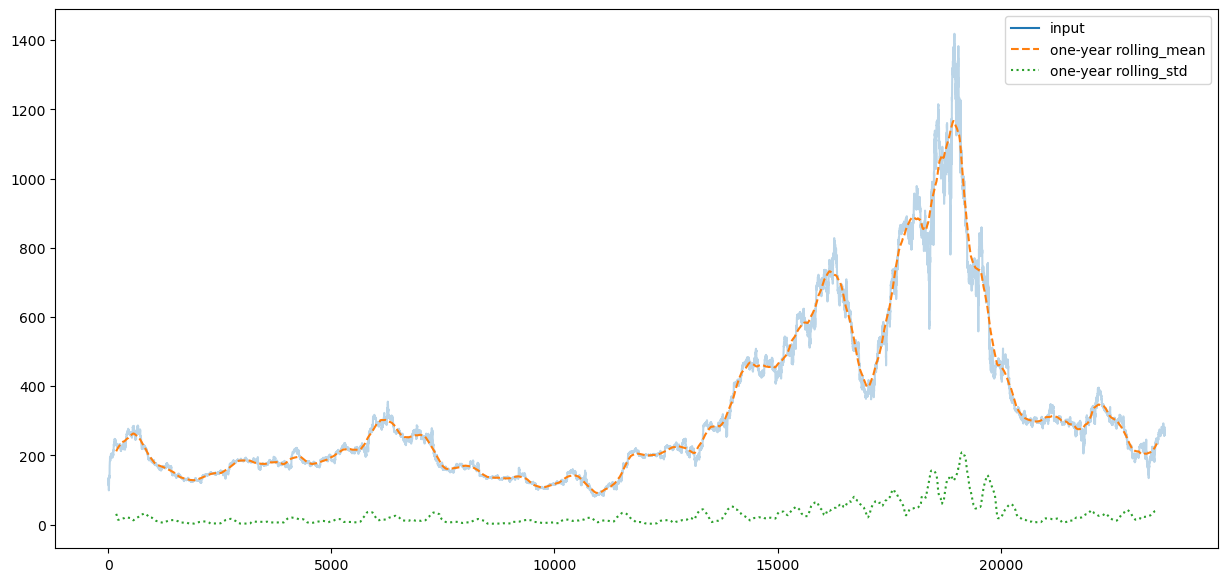

In [80]:
rolling = price_open.rolling(365, center =True)

data = pd.DataFrame({'input': price_open,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize = (15,7))
ax.lines[0].set_alpha(0.3)

In [81]:
price_open

0        129.94
1        119.51
2        124.47
3        124.08
4        124.85
          ...  
23669    265.74
23670    268.79
23671    274.83
23672    275.01
23673    279.98
Name: Open, Length: 23674, dtype: float64

In [82]:
# Shift the price at open by -1 day. Note the index 0 above gets removed and last date creates a NaN.
one_day_shift = price_open.shift(-1)
one_day_shift

0        119.51
1        124.47
2        124.08
3        124.85
4        128.39
          ...  
23669    268.79
23670    274.83
23671    275.01
23672    279.98
23673       NaN
Name: Open, Length: 23674, dtype: float64

In [84]:
two_days_shift = price_open.shift(2)
two_days_shift

0           NaN
1           NaN
2        129.94
3        119.51
4        124.47
          ...  
23669    268.00
23670    272.57
23671    265.74
23672    268.79
23673    274.83
Name: Open, Length: 23674, dtype: float64

# NOTEBOOK END